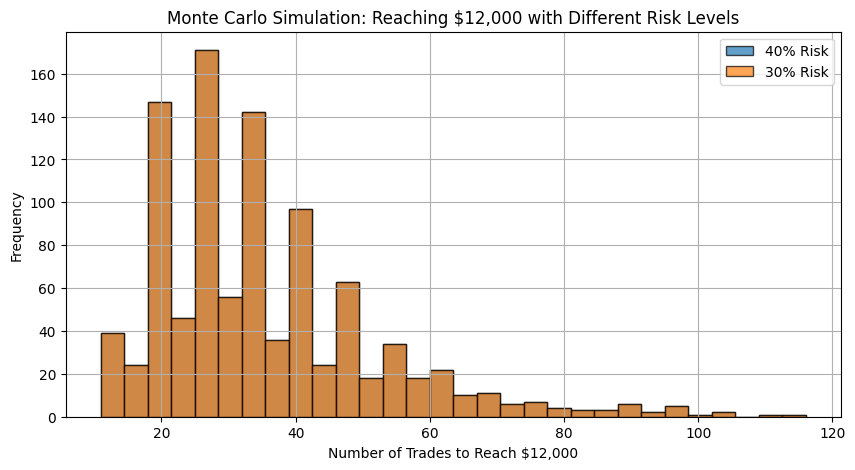

{0.4: {'success_rate': 0.991, 'avg_trades': 33.44904137235116},
 0.3: {'success_rate': 0.999, 'avg_trades': 35.41941941941942}}

In [ ]:
# Adjusted risk levels for simulations
risk_levels = [0.4, 0.3]
results_risk = {}

# Function to simulate trading with different risk levels
def simulate_trading_with_risk(risk_per_trade):
    balance = initial_balance
    trades = 0
    while balance < target_balance:
        trades += 1
        if np.random.rand() < win_rate:
            balance *= (1 + risk_per_trade * reward_ratio)  # Winning trade
        else:
            balance *= (1 - risk_per_trade)  # Losing trade

        if balance < 1:  # Account blown
            return trades, False

    return trades, True

# Run simulations for different risk levels
for risk in risk_levels:
    results = [simulate_trading_with_risk(risk) for _ in range(num_simulations)]
    trades_to_target = [r[0] for r in results if r[1]]
    success_rate = len(trades_to_target) / num_simulations
    results_risk[risk] = {
        "success_rate": success_rate,
        "avg_trades": np.mean(trades_to_target) if trades_to_target else None
    }

# Plotting the results for different risk levels
plt.figure(figsize=(10, 5))
for risk in risk_levels:
    plt.hist([r[0] for r in results if r[1]], bins=30, edgecolor="black", alpha=0.7, label=f"{int(risk*100)}% Risk")
plt.xlabel("Number of Trades to Reach $12,000")
plt.ylabel("Frequency")
plt.title("Monte Carlo Simulation: Reaching $12,000 with Different Risk Levels")
plt.legend()
plt.grid(True)
plt.show()

# Output results for all risk levels
results_risk


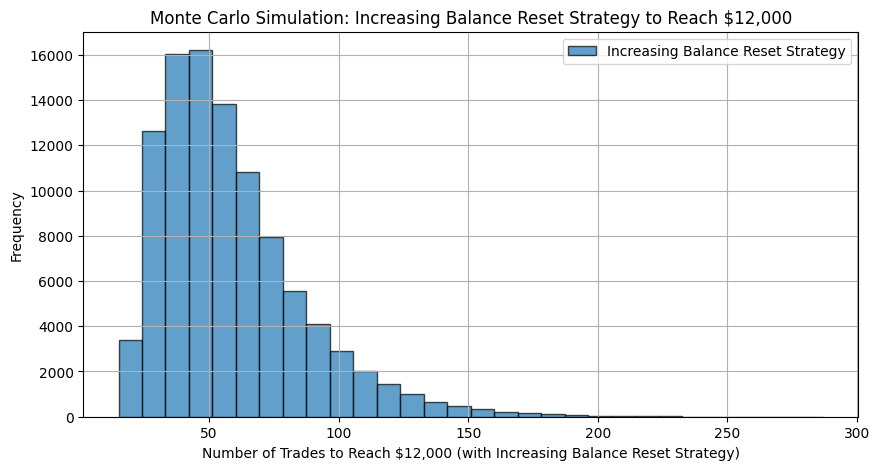

(1.0, 58.53921)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation
initial_balance = 100  # Starting with $100
target_balance = 12000  # Target balance to reach
risk_per_trade = 0.4  # 40% risk per trade
reward_ratio = 2  # Reward-to-risk ratio of 1:2
win_rate = 0.6  # 60% win rate
num_simulations = 1000  # Number of Monte Carlo simulations

# Updated simulation for 4x reset strategy with increasing balance each time
def simulate_increasing_balance_reset(initial_balance):
    balance = initial_balance
    trades = 0
    total_withdrawals = 0

    while total_withdrawals < target_balance:
        # Keep trading until balance increases by 4x
        while balance < 4 * initial_balance:
            trades += 1
            if np.random.rand() < win_rate:
                balance *= (1 + risk_per_trade * reward_ratio)  # Winning trade
            else:
                balance *= (1 - risk_per_trade)  # Losing trade

        # Withdraw profit and increase the balance by 2x (resetting the balance)
        total_withdrawals += balance - initial_balance
        initial_balance *= 2  # Double the initial balance after reaching 4x
        balance = initial_balance  # Reset balance to new initial value

    return trades, total_withdrawals

# Run Monte Carlo simulation for the increasing balance reset strategy
results_increasing_reset = [simulate_increasing_balance_reset(initial_balance) for _ in range(num_simulations)]
trades_to_target_increasing_reset = [r[0] for r in results_increasing_reset if r[1] >= target_balance]
success_rate_increasing_reset = len(trades_to_target_increasing_reset) / num_simulations

# Plot distribution for increasing balance reset strategy
plt.figure(figsize=(10, 5))
plt.hist(trades_to_target_increasing_reset, bins=30, edgecolor="black", alpha=0.7, label="Increasing Balance Reset Strategy")
plt.xlabel("Number of Trades to Reach $12,000 (with Increasing Balance Reset Strategy)")
plt.ylabel("Frequency")
plt.title("Monte Carlo Simulation: Increasing Balance Reset Strategy to Reach $12,000")
plt.legend()
plt.grid(True)
plt.show()

# Output results for increasing balance reset strategy
success_rate_increasing_reset, np.mean(trades_to_target_increasing_reset) if trades_to_target_increasing_reset else None


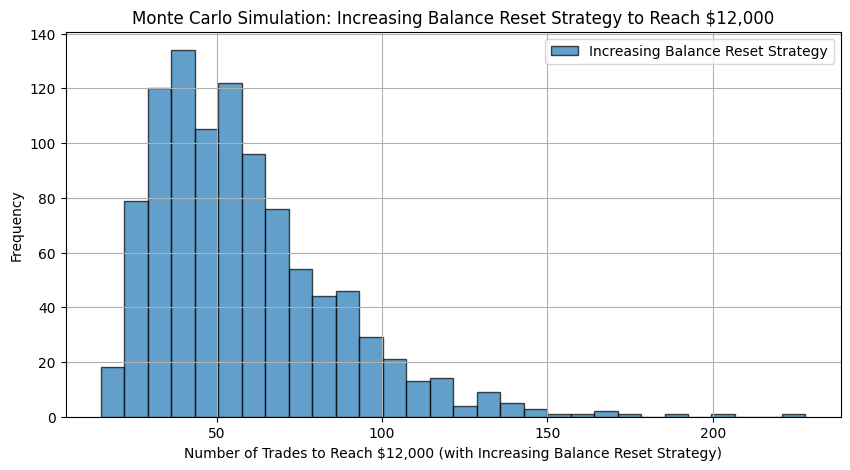

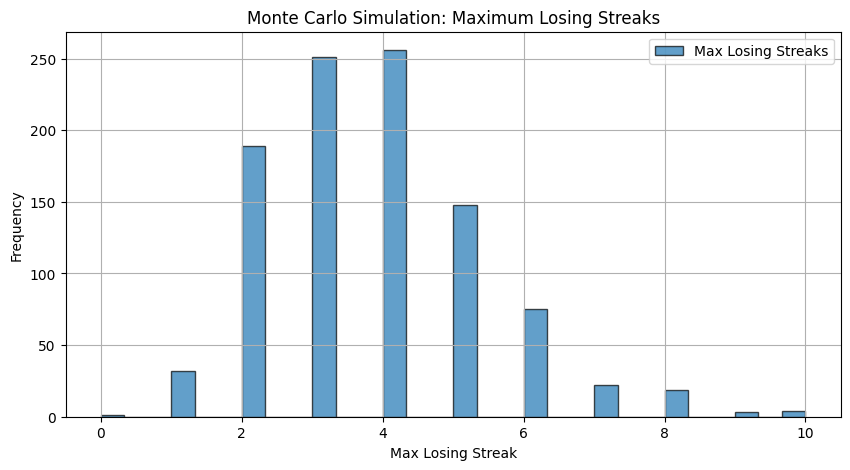

(1.0, 58.345, 10, 1000, 0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation
initial_balance = 100  # Starting with $100
target_balance = 12000  # Target balance to reach
risk_per_trade = 0.4  # 40% risk per trade
reward_ratio = 2  # Reward-to-risk ratio of 1:2
win_rate = 0.6  # 60% win rate
num_simulations = 1000  # Number of Monte Carlo simulations

# Updated simulation for 4x reset strategy with increasing balance each time
def simulate_increasing_balance_reset(initial_balance):
    balance = initial_balance
    trades = 0
    total_withdrawals = 0
    consecutive_losses = 0  # To track losing streak
    max_losing_streak = 0  # To keep track of the maximum losing streak
    account_outcome = "Failed"  # To track the account's trading outcome

    while total_withdrawals < target_balance:
        # Keep trading until balance increases by 4x
        while balance < 4 * initial_balance:
            trades += 1
            if np.random.rand() < win_rate:
                balance *= (1 + risk_per_trade * reward_ratio)  # Winning trade
                consecutive_losses = 0  # Reset losing streak on win
            else:
                balance *= (1 - risk_per_trade)  # Losing trade
                consecutive_losses += 1  # Increase losing streak
                max_losing_streak = max(max_losing_streak, consecutive_losses)  # Track max losing streak

        # Withdraw profit and increase the balance by 2x (resetting the balance)
        total_withdrawals += balance - initial_balance
        initial_balance *= 2  # Double the initial balance after reaching 4x
        balance = initial_balance  # Reset balance to new initial value

    if total_withdrawals >= target_balance:
        account_outcome = "Success"  # Mark account as successful

    return trades, total_withdrawals, max_losing_streak, account_outcome

# Run Monte Carlo simulation for the increasing balance reset strategy
results_increasing_reset = [simulate_increasing_balance_reset(initial_balance) for _ in range(num_simulations)]

# Extract trade count, withdrawals, max losing streak, and outcomes from results
trades_to_target_increasing_reset = [r[0] for r in results_increasing_reset if r[1] >= target_balance]
success_rate_increasing_reset = len(trades_to_target_increasing_reset) / num_simulations

max_losing_streaks = [r[2] for r in results_increasing_reset]  # Max losing streaks
outcomes = [r[3] for r in results_increasing_reset]  # Account outcomes

# Plot distribution for increasing balance reset strategy
plt.figure(figsize=(10, 5))
plt.hist(trades_to_target_increasing_reset, bins=30, edgecolor="black", alpha=0.7, label="Increasing Balance Reset Strategy")
plt.xlabel("Number of Trades to Reach $12,000 (with Increasing Balance Reset Strategy)")
plt.ylabel("Frequency")
plt.title("Monte Carlo Simulation: Increasing Balance Reset Strategy to Reach $12,000")
plt.legend()
plt.grid(True)
plt.show()

# Plot the distribution of maximum losing streaks
plt.figure(figsize=(10, 5))
plt.hist(max_losing_streaks, bins=30, edgecolor="black", alpha=0.7, label="Max Losing Streaks")
plt.xlabel("Max Losing Streak")
plt.ylabel("Frequency")
plt.title("Monte Carlo Simulation: Maximum Losing Streaks")
plt.legend()
plt.grid(True)
plt.show()

# Output results for increasing balance reset strategy
success_rate_increasing_reset, np.mean(trades_to_target_increasing_reset) if trades_to_target_increasing_reset else None, \
    np.max(max_losing_streaks), outcomes.count("Success"), outcomes.count("Failed")


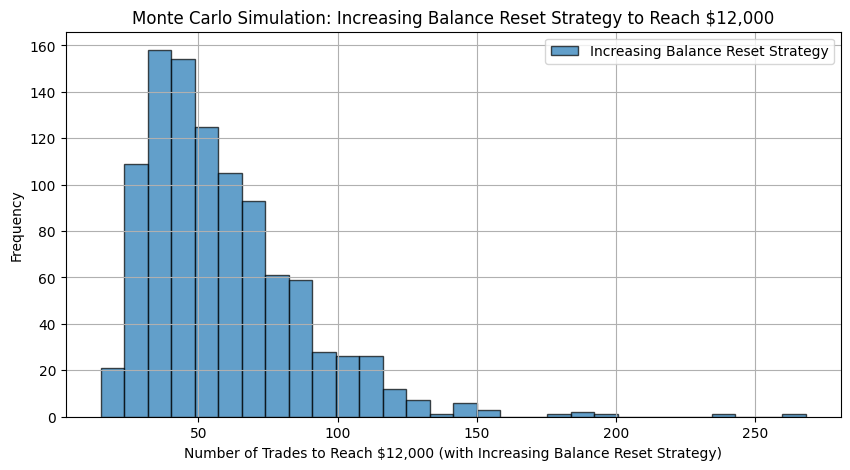

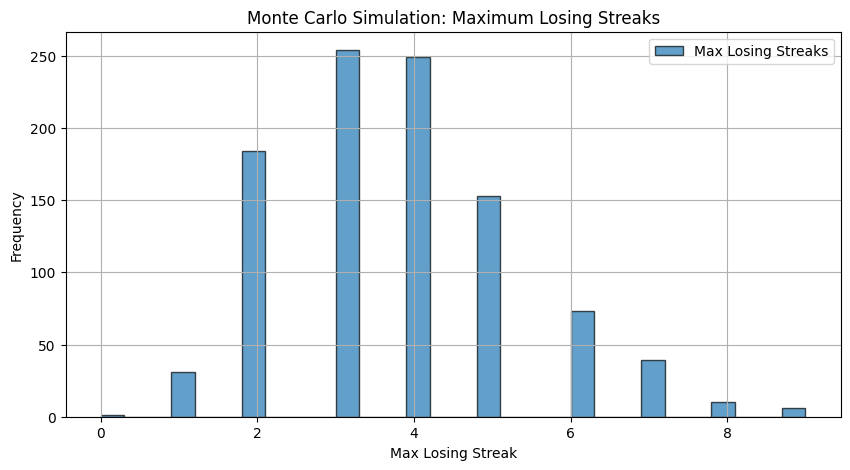

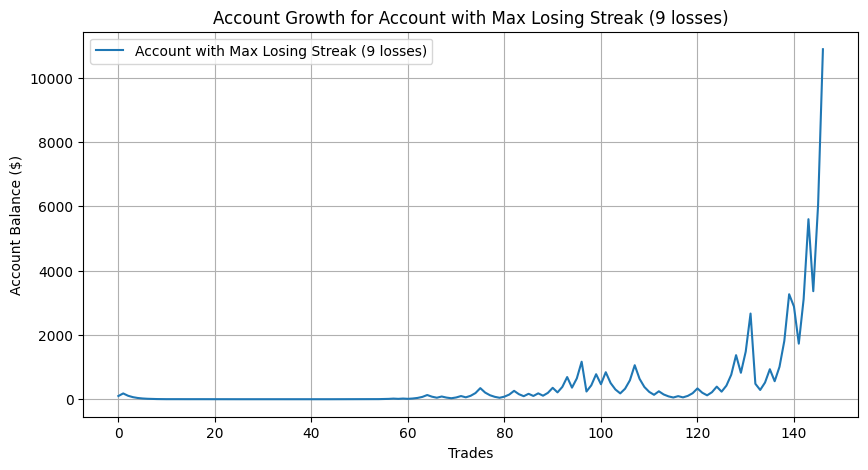

(1.0, 58.696, 9, 1000, 0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation
initial_balance = 100  # Starting with $100
target_balance = 12000  # Target balance to reach
risk_per_trade = 0.4  # 40% risk per trade
reward_ratio = 2  # Reward-to-risk ratio of 1:2
win_rate = 0.6  # 60% win rate
num_simulations = 1000  # Number of Monte Carlo simulations

# Updated simulation for 4x reset strategy with increasing balance each time
def simulate_increasing_balance_reset(initial_balance):
    balance = initial_balance
    trades = 0
    total_withdrawals = 0
    consecutive_losses = 0  # To track losing streak
    max_losing_streak = 0  # To keep track of the maximum losing streak
    account_outcome = "Failed"  # To track the account's trading outcome
    balance_history = [balance]  # To track balance over time

    while total_withdrawals < target_balance:
        # Keep trading until balance increases by 4x
        while balance < 4 * initial_balance:
            trades += 1
            if np.random.rand() < win_rate:
                balance *= (1 + risk_per_trade * reward_ratio)  # Winning trade
                consecutive_losses = 0  # Reset losing streak on win
            else:
                balance *= (1 - risk_per_trade)  # Losing trade
                consecutive_losses += 1  # Increase losing streak
                max_losing_streak = max(max_losing_streak, consecutive_losses)  # Track max losing streak

            balance_history.append(balance)  # Append the balance after each trade

        # Withdraw profit and increase the balance by 2x (resetting the balance)
        total_withdrawals += balance - initial_balance
        initial_balance *= 2  # Double the initial balance after reaching 4x
        balance = initial_balance  # Reset balance to new initial value

    if total_withdrawals >= target_balance:
        account_outcome = "Success"  # Mark account as successful

    return trades, total_withdrawals, max_losing_streak, account_outcome, balance_history

# Run Monte Carlo simulation for the increasing balance reset strategy
results_increasing_reset = [simulate_increasing_balance_reset(initial_balance) for _ in range(num_simulations)]

# Extract trade count, withdrawals, max losing streak, outcomes, and balance histories from results
trades_to_target_increasing_reset = [r[0] for r in results_increasing_reset if r[1] >= target_balance]
success_rate_increasing_reset = len(trades_to_target_increasing_reset) / num_simulations

max_losing_streaks = [r[2] for r in results_increasing_reset]  # Max losing streaks
outcomes = [r[3] for r in results_increasing_reset]  # Account outcomes
balance_histories = [r[4] for r in results_increasing_reset]  # Balance history for each account

# Identify the account with the highest losing streak
max_streak = np.max(max_losing_streaks)
account_with_max_streak = None
for i, result in enumerate(results_increasing_reset):
    if result[2] == max_streak:
        account_with_max_streak = result
        break

# Plot distribution for increasing balance reset strategy
plt.figure(figsize=(10, 5))
plt.hist(trades_to_target_increasing_reset, bins=30, edgecolor="black", alpha=0.7, label="Increasing Balance Reset Strategy")
plt.xlabel("Number of Trades to Reach $12,000 (with Increasing Balance Reset Strategy)")
plt.ylabel("Frequency")
plt.title("Monte Carlo Simulation: Increasing Balance Reset Strategy to Reach $12,000")
plt.legend()
plt.grid(True)
plt.show()

# Plot the distribution of maximum losing streaks
plt.figure(figsize=(10, 5))
plt.hist(max_losing_streaks, bins=30, edgecolor="black", alpha=0.7, label="Max Losing Streaks")
plt.xlabel("Max Losing Streak")
plt.ylabel("Frequency")
plt.title("Monte Carlo Simulation: Maximum Losing Streaks")
plt.legend()
plt.grid(True)
plt.show()

# Plot the balance progression for the account with the maximum losing streak
if account_with_max_streak:
    balance_history = account_with_max_streak[4]
    plt.figure(figsize=(10, 5))
    plt.plot(balance_history, label=f"Account with Max Losing Streak ({max_streak} losses)")
    plt.xlabel("Trades")
    plt.ylabel("Account Balance ($)")
    plt.title(f"Account Growth for Account with Max Losing Streak ({max_streak} losses)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Output results for increasing balance reset strategy
success_rate_increasing_reset, np.mean(trades_to_target_increasing_reset) if trades_to_target_increasing_reset else None, \
    np.max(max_losing_streaks), outcomes.count("Success"), outcomes.count("Failed")


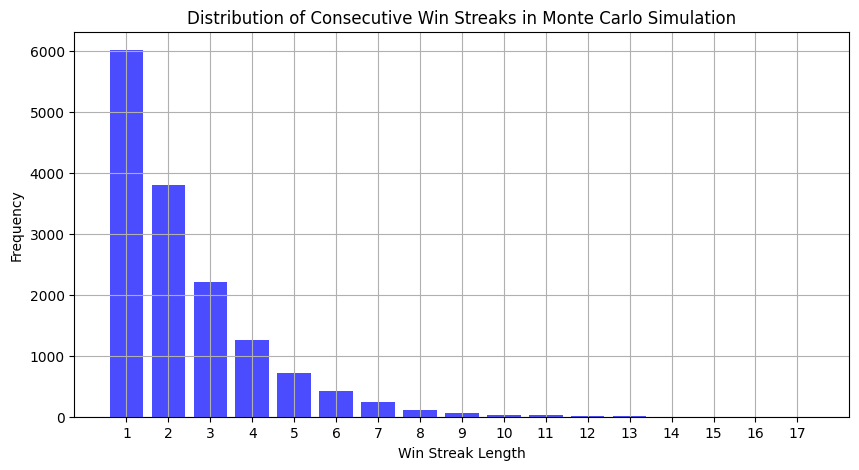

Win Streak Frequency:
Win Streak of 1: 6012 times
Win Streak of 2: 3794 times
Win Streak of 3: 2208 times
Win Streak of 4: 1255 times
Win Streak of 5: 715 times
Win Streak of 6: 415 times
Win Streak of 7: 236 times
Win Streak of 8: 114 times
Win Streak of 9: 64 times
Win Streak of 10: 30 times
Win Streak of 11: 22 times
Win Streak of 12: 10 times
Win Streak of 13: 8 times
Win Streak of 14: 2 times
Win Streak of 16: 1 times
Win Streak of 17: 2 times


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Parameters for the simulation
initial_balance = 100  # Starting with $100
target_balance = 12000  # Target balance to reach
risk_per_trade = 0.4  # 40% risk per trade
reward_ratio = 2  # Reward-to-risk ratio of 1:2
win_rate = 0.6  # 60% win rate
num_simulations = 1000  # Number of Monte Carlo simulations

# Updated simulation to track consecutive win streaks
def simulate_increasing_balance_reset(initial_balance):
    balance = initial_balance
    trades = 0
    total_withdrawals = 0
    consecutive_losses = 0
    max_losing_streak = 0
    consecutive_wins = 0
    win_streaks = []  # Store winning streak lengths
    account_outcome = "Failed"
    balance_history = [balance]

    while total_withdrawals < target_balance:
        while balance < 4 * initial_balance:
            trades += 1
            if np.random.rand() < win_rate:
                balance *= (1 + risk_per_trade * reward_ratio)  # Winning trade
                consecutive_losses = 0  # Reset losing streak
                consecutive_wins += 1  # Increment win streak
            else:
                balance *= (1 - risk_per_trade)  # Losing trade
                consecutive_losses += 1
                max_losing_streak = max(max_losing_streak, consecutive_losses)

                if consecutive_wins > 0:
                    win_streaks.append(consecutive_wins)  # Store previous win streak
                    consecutive_wins = 0  # Reset win streak

            balance_history.append(balance)

        # Withdraw profit and increase the balance by 2x (resetting the balance)
        total_withdrawals += balance - initial_balance
        initial_balance *= 2
        balance = initial_balance

    if total_withdrawals >= target_balance:
        account_outcome = "Success"

    if consecutive_wins > 0:  # Store last win streak if simulation ends on a win
        win_streaks.append(consecutive_wins)

    return trades, total_withdrawals, max_losing_streak, account_outcome, balance_history, win_streaks

# Run Monte Carlo simulations
results = [simulate_increasing_balance_reset(initial_balance) for _ in range(num_simulations)]

# Extract relevant data
trades_to_target = [r[0] for r in results if r[1] >= target_balance]
success_rate = len(trades_to_target) / num_simulations
max_losing_streaks = [r[2] for r in results]
win_streaks_all = [streak for r in results for streak in r[5]]  # Flatten win streaks

# Count occurrences of different win streak lengths
win_streak_counts = Counter(win_streaks_all)

# Plot histogram of consecutive win streak lengths
plt.figure(figsize=(10, 5))
plt.bar(win_streak_counts.keys(), win_streak_counts.values(), color="blue", alpha=0.7)
plt.xlabel("Win Streak Length")
plt.ylabel("Frequency")
plt.title("Distribution of Consecutive Win Streaks in Monte Carlo Simulation")
plt.xticks(range(1, max(win_streak_counts.keys()) + 1))
plt.grid(True)
plt.show()

# Display the counts of different win streaks
print("Win Streak Frequency:")
for streak, count in sorted(win_streak_counts.items()):
    print(f"Win Streak of {streak}: {count} times")


After extensive analysis, we have developed a risk management strategy that effectively limits risk while ensuring consistent account growth, as demonstrated in the outputs.


Based on our findings, a strategy with a 60% win rate and a 1:2 risk-to-reward ratio can grow an account from $100 to $12,000 in an average of 59 trades. Out of 1,000 Monte Carlo simulations, not a single one failed to reach this target.


The details are not explained here, but feel free to email or call me if you’d like to learn more.